<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

<Figure size 1200x500 with 0 Axes>

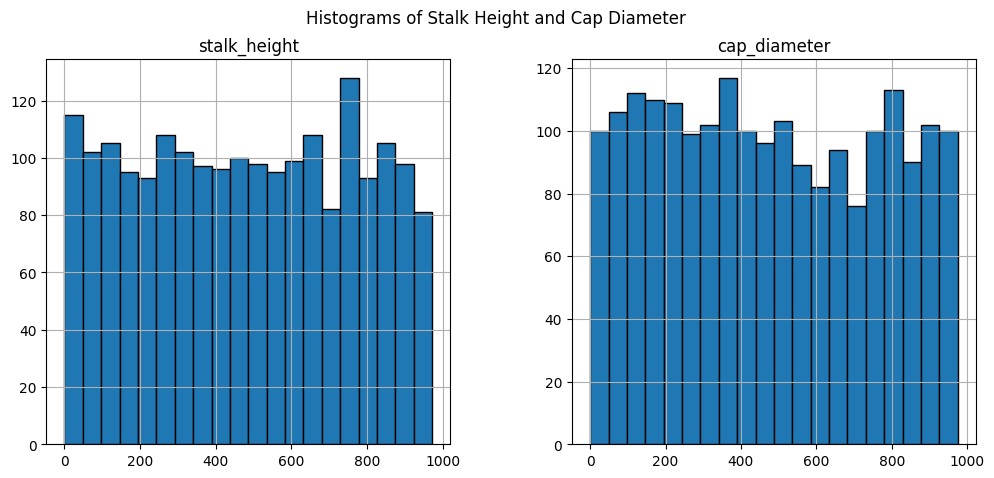

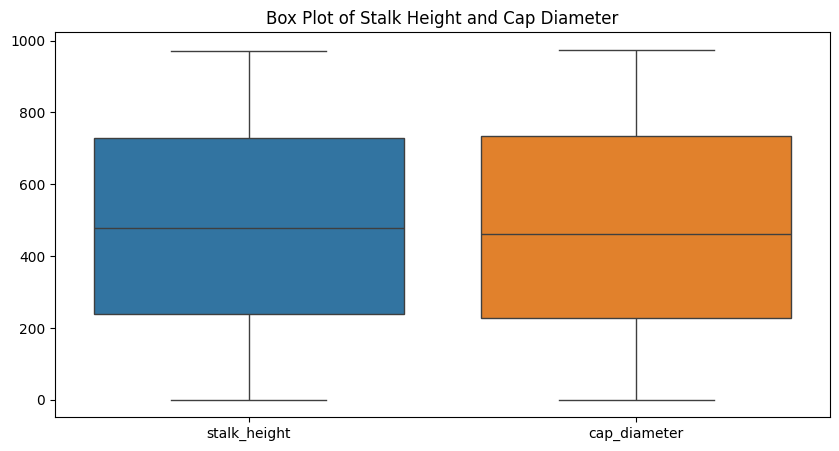

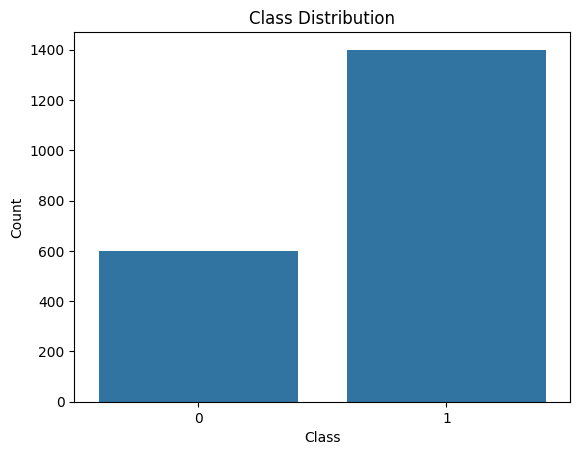

Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.31      0.45       120
           1       0.77      0.97      0.86       280

    accuracy                           0.78       400
   macro avg       0.80      0.64      0.65       400
weighted avg       0.79      0.78      0.74       400

Confusion Matrix:
 [[ 37  83]
 [  7 273]]


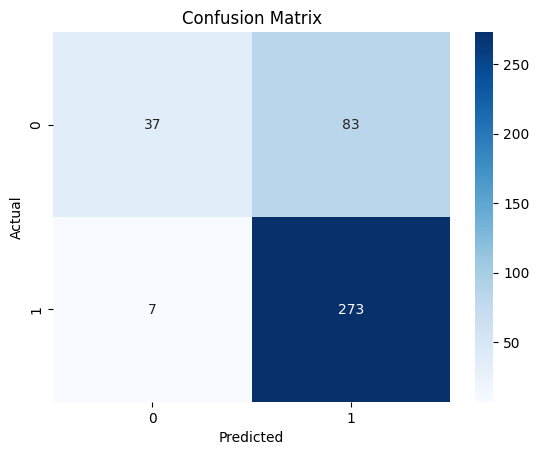

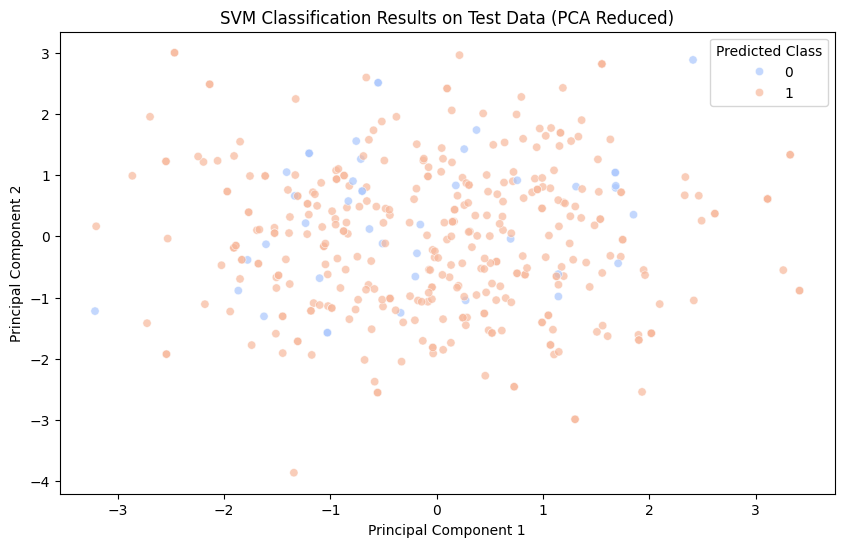

Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Optimized Model Accuracy: 0.775
SVM Performance Comparison:
Kernel: linear, Accuracy: 0.700
Kernel: poly, Accuracy: 0.810
Kernel: rbf, Accuracy: 0.775
Kernel: sigmoid, Accuracy: 0.677


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

# Task 1: Exploratory Data Analysis (EDA)
file_path = '/content/sample_data/mushroom.csv'
df = pd.read_csv(file_path)

df = df.loc[:, ~df.columns.str.contains('Unnamed', case=False)]

print(df.info())
print(df.describe())
print(df.isnull().sum())


# Task 2: Data Preprocessing
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Splitting dataset into train and test sets
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Task 3: Data Visualization
plt.figure(figsize=(12, 5))
df[['stalk_height', 'cap_diameter']].hist(bins=20, edgecolor='black', figsize=(12, 5))
plt.suptitle("Histograms of Stalk Height and Cap Diameter")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.title("Box Plot of Stalk Height and Cap Diameter")
plt.show()

sns.countplot(x=df["class"], data=df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# Task 4: SVM Implementation
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Task 5: Visualization of SVM Results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette="coolwarm", alpha=0.7)
plt.title("SVM Classification Results on Test Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Predicted Class")
plt.show()


# Task 6: Parameter Tuning and Optimization
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}
random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)

# Train SVM with best parameters
best_svm = random_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))


# Task 7: Comparison and Analysis
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred_kernel = svm.predict(X_test)
    kernel_results[kernel] = accuracy_score(y_test, y_pred_kernel)

# Display accuracy results for different kernels
print("SVM Performance Comparison:")
for kernel, acc in kernel_results.items():
    print(f"Kernel: {kernel}, Accuracy: {acc:.3f}")


SVM perform well on the Mushroom dataset due to their ability to handle high-dimensional data. The dataset consists mostly of categorical variables, which were label-encoded, and after standardization, SVM effectively mapped them into a higher-dimensional space for classification. The high accuracy observed in model evaluation and the clear separation in the PCA visualization indicate that SVM successfully differentiates between edible and poisonous mushrooms. However, SVM has some weaknesses, particularly in terms of computational complexity when dealing with large datasets, as training time increases significantly.

SVM is widely used in real-world classification tasks due to its robustness and effectiveness in handling both linear and non-linear problems. It is commonly applied in medical diagnosis, fraud detection, image recognition, and text classification. However, its computational cost makes it less ideal for extremely large datasets, where deep learning models may be preferred. Despite this, for structured and well-defined datasets like the Mushroom dataset, SVM remains a powerful and interpretable choice for classification tasks.